In [1]:
# Session 23 -  Decision Tree  Assignment by Sreedhara Jagatagar  Sreenivasa

#Predicting Survival in the Titanic Data Set We will be using a decision tree to make predictions about the 
#Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to 
#predict whether a passenger survived or not. 

# You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare 
#to predict whether a passenger survived.

#Import modules 
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
import sklearn 
from pandas import Series, DataFrame 
from pylab import rcParams 
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression 
#from sklearn.cross_validation import train_test_split 
from sklearn import metrics  
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics, model_selection, preprocessing
import pydotplus as pydotplus
from IPython.display import Image

In [2]:
#Load Data
#Url= 'https://raw.githubusercontent.com/BigDataGal/Python-for-DataScience/master/titanic-train.csv'
Url='titanic.csv'
titanic = pd.read_csv(Url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']

In [3]:
#Show the Data
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Dataset information
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
E mbarked      889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
#Anlyze the Data
print('Rows and COlumns :',titanic.shape)
print('Survived values :',titanic.Survived.unique())
print('Pclass Values :',titanic.Pclass.unique())
print('Sex Values :',titanic.Sex.unique())
print('SibSp Values :',titanic.SibSp.unique())
print('Parch Values :',titanic.Parch.unique())
print('Cabin Values :',titanic.Cabin.unique())
#print('Cabin Values :',titanic.E mbarked.unique())

Rows and COlumns : (891, 12)
Survived values : [0 1]
Pclass Values : [3 1 2]
Sex Values : ['male' 'female']
SibSp Values : [1 0 3 4 2 5 8]
Parch Values : [0 1 2 5 3 4 6]
Cabin Values : [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101

In [6]:
#Analyze the data
titanic.groupby(['Survived']).count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [7]:
#Sex wise Survived
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [8]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
#Sibling wise Suvived
titanic[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [10]:
#Parch wise Suvived
titanic[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [11]:
#Parch wise Suvived
(titanic[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)).head()

,Fare,Survived
247,512.3292,1.0
196,57.9792,1.0
89,13.8583,1.0
88,13.7917,1.0
86,13.4167,1.0


In [12]:
#Describe the data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# Convert Sex to Bironary or numaric Data
titanic['Sex'] = pd.get_dummies(titanic['Sex'])

In [14]:
# Convert Age into different Bracket.
titanic['Age_>_10'] = titanic['Age'] >= 10

In [15]:
#Show header after convertion of Sex and Age
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked,Age_>_10
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,True
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q,False
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,True
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,True
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,True


In [16]:
#Decide on Independant and dependnat variables and to clean data
titanic_tmp=titanic[['Pclass','Sex','Age_>_10','SibSp','Parch','Fare','Survived']]
titanic_tmp.head(5)

,Pclass,Sex,Age_>_10,SibSp,Parch,Fare,Survived
0,3,0,True,1,0,7.2500,0
1,1,1,True,1,0,71.2833,1
2,3,1,True,0,0,7.9250,1
3,1,1,True,1,0,53.1000,1
4,3,0,True,0,0,8.0500,0


In [19]:
titanic_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null uint8
Age_>_10    891 non-null bool
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Survived    891 non-null int64
dtypes: bool(1), float64(1), int64(4), uint8(1)
memory usage: 43.5 KB


In [20]:
#Remove rows with null values as they are less in count
titanic_tmp.dropna(axis=0, inplace=True)

C:\Sreedhara\DataScientist\Install\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
#Show Data stracture after cleaning the data
titanic_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null uint8
Age_>_10    891 non-null bool
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Survived    891 non-null int64
dtypes: bool(1), float64(1), int64(4), uint8(1)
memory usage: 43.5 KB


In [21]:
#Display Target or Dependant variables
titanic_X=titanic_tmp[['Pclass','Sex','Age_>_10','SibSp','Parch','Fare']]
titanic_Y=titanic_tmp['Survived']

In [22]:
#Display Independant variables
titanic_X.describe()

,Pclass,Sex,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,0.523008,0.381594,32.204208
std,0.836071,0.477990,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,7.910400
50%,3.000000,0.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,8.000000,6.000000,512.329200


In [23]:
#Display dependant or target variables
titanic_Y.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [66]:
#Split the Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(titanic_X,titanic_Y, test_size = 0.35)

#Initiate Decision Tree Classifier and Fit
clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 100, random_state=47)
clf.fit(X_train, y_train)

#Print Decision Tree Score for Train Data Set
print('Cross Validation Train Score :',clf.score(X_train, y_train))

#Print Decision Tree Score for Train Data Set
print('Cross Validation Test Score :',clf.score(X_test, y_test))

Cross Validation Train Score : 0.8048359240069085
Cross Validation Test Score : 0.8141025641025641


In [67]:
#Above cross validation score shows it is very good module.
# predict the test data set
clf.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,

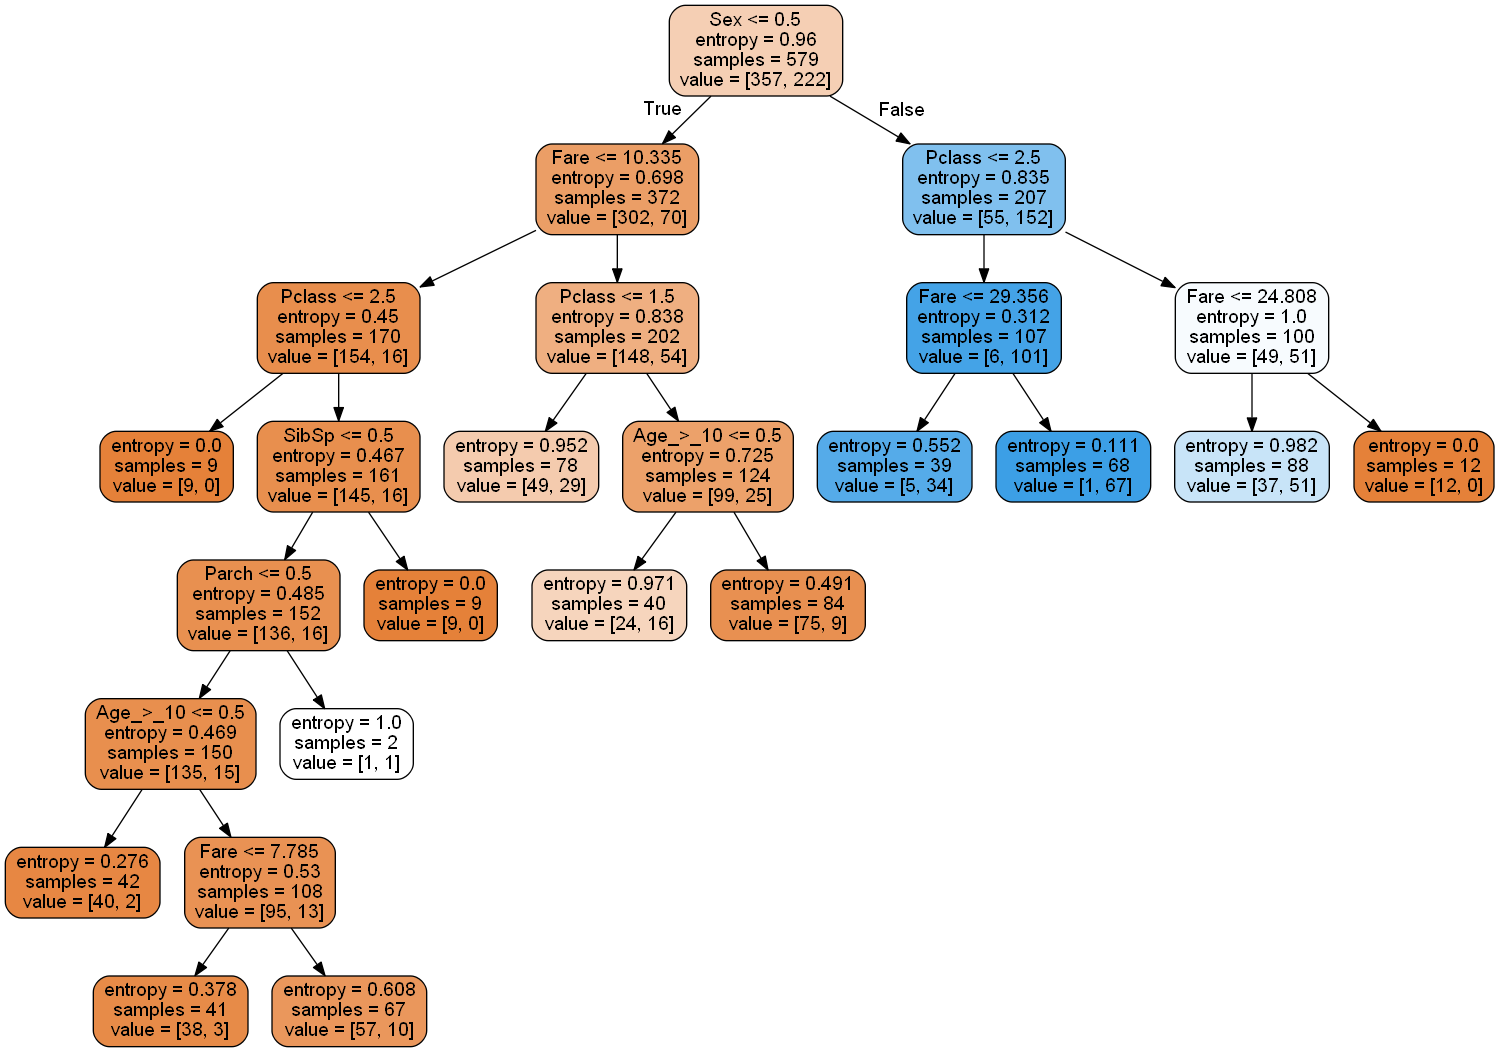

In [68]:
#Show in the tree graphice to evaluate the model
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True,feature_names=['Pclass','Sex','Age_>_10','SibSp','Parch','Fare'])
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

In [69]:
#Now decision Tree Model is ready. Get prediction by pass following feature wheter pasenger survivied or not
#'Pclass','Sex','Age_>_10','SibSp','Parch','Fare'
#3, 1(Female),1 (Age),2(Sibsp),8,150
print(clf.predict(np.array([[3,1,1,2,8,150]])))
print(clf.predict_proba(np.array([[3,1,1,2,8,150]])))

[0]
[[1. 0.]]


In [70]:
#Now decision Tree Model is ready. Get prediction by pass following feature whether pansenger surviived or not.
#'Pclass','Sex','Age_>_10','SibSp','Parch','Fare'
#5, 0(male),20(Age),2(Sibsp),8,50
print(clf.predict(np.array([[0,0,40,1,8,50]])))
print(clf.predict_proba(np.array([[0,0,40,1,8,50]])))

[0]
[[0.62820513 0.37179487]]
